# Import Modules

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

# Initialize and load dataset

In [2]:
train = pd.read_csv('../dataset/biner_classification/train_1.csv')
test  = pd.read_csv('../dataset/biner_classification/test_1.csv')

In [3]:
train.columns

Index(['invoice_id', 'branch', 'city', 'gender', 'product_line', 'unit_price',
       'quantity', 'tax_5_percents', 'total', 'payment', 'cogs',
       'gross_margin_percentage', 'gross_income', 'rating', 'month', 'day',
       'year', 'hours', 'minutes', 'customer_type'],
      dtype='object')

In [4]:
train.head()

,invoice_id,branch,city,gender,product_line,unit_price,quantity,tax_5_percents,total,payment,cogs,gross_margin_percentage,gross_income,rating,month,day,year,hours,minutes,customer_type
0,848-62-7243,0,2,1,3,24.89,9,11.2005,235.2105,0,224.01,4.761905,11.2005,7.4,3,15,2019,15,36,0
1,583-41-4548,2,1,1,4,16.67,7,5.8345,122.5245,2,116.69,4.761905,5.8345,7.4,2,7,2019,11,36,0
2,800-09-8606,0,2,0,4,87.37,5,21.8425,458.6925,0,436.85,4.761905,21.8425,6.6,1,29,2019,19,45,1
3,283-26-5248,2,1,0,2,98.52,10,49.2600,1034.4600,2,985.20,4.761905,49.2600,4.5,1,30,2019,20,23,1
4,288-62-1085,0,2,1,1,38.54,5,9.6350,202.3350,2,192.70,4.761905,9.6350,5.6,1,9,2019,13,34,1


## Set feature and target to train and test dataset

In [5]:
X_train = train.loc[:, ['branch', 'city', 'gender', 'product_line', 'unit_price',
                        'quantity', 'tax_5_percents', 'total', 'payment', 'cogs',
                        'gross_margin_percentage', 'gross_income', 'rating', 'month',
                        'day', 'year', 'hours', 'minutes']
                   ]

y_train = train.iloc[:, 19:20]

In [6]:
X_test = test.loc[:, ['branch', 'city', 'gender', 'product_line', 'unit_price',
                      'quantity', 'tax_5_percents', 'total', 'payment', 'cogs',
                      'gross_margin_percentage', 'gross_income', 'rating', 'month',
                      'day', 'year', 'hours', 'minutes']
                 ]

y_test = test.iloc[:, 19:20]

# Biner Classification with SGDClassifier 

## Prepare Model

In [7]:
biner_classification = SGDClassifier(max_iter=1000, tol=1e-3, alpha=0.0001, eta0=0.1, random_state=42)

In [8]:
biner_classification.fit(X_train, np.ravel(y_train))

SGDClassifier(eta0=0.1, random_state=42)

In [9]:
biner_classification.score(X_test, y_test)

0.49

In [10]:
y_train.head()

,customer_type
0,0
1,0
2,1
3,1
4,1


In [11]:
X_train.head()

,branch,city,gender,product_line,unit_price,quantity,tax_5_percents,total,payment,cogs,gross_margin_percentage,gross_income,rating,month,day,year,hours,minutes
0,0,2,1,3,24.89,9,11.2005,235.2105,0,224.01,4.761905,11.2005,7.4,3,15,2019,15,36
1,2,1,1,4,16.67,7,5.8345,122.5245,2,116.69,4.761905,5.8345,7.4,2,7,2019,11,36
2,0,2,0,4,87.37,5,21.8425,458.6925,0,436.85,4.761905,21.8425,6.6,1,29,2019,19,45
3,2,1,0,2,98.52,10,49.2600,1034.4600,2,985.20,4.761905,49.2600,4.5,1,30,2019,20,23
4,0,2,1,1,38.54,5,9.6350,202.3350,2,192.70,4.761905,9.6350,5.6,1,9,2019,13,34


In [12]:
train.head()

,invoice_id,branch,city,gender,product_line,unit_price,quantity,tax_5_percents,total,payment,cogs,gross_margin_percentage,gross_income,rating,month,day,year,hours,minutes,customer_type
0,848-62-7243,0,2,1,3,24.89,9,11.2005,235.2105,0,224.01,4.761905,11.2005,7.4,3,15,2019,15,36,0
1,583-41-4548,2,1,1,4,16.67,7,5.8345,122.5245,2,116.69,4.761905,5.8345,7.4,2,7,2019,11,36,0
2,800-09-8606,0,2,0,4,87.37,5,21.8425,458.6925,0,436.85,4.761905,21.8425,6.6,1,29,2019,19,45,1
3,283-26-5248,2,1,0,2,98.52,10,49.2600,1034.4600,2,985.20,4.761905,49.2600,4.5,1,30,2019,20,23,1
4,288-62-1085,0,2,1,1,38.54,5,9.6350,202.3350,2,192.70,4.761905,9.6350,5.6,1,9,2019,13,34,1


In [13]:
branch                  = 0
city                    = 2
gender                  = 1
product_line            = 3
unit_price              = 24.89
quantity                = 9
tax_5_percents          = 11.2005
total                   = 235.2105
payment                 = 0
cogs                    = 224.01
gross_margin_percentage = 4.761905
gross_income            = 11.2005
rating                  = 7.4
month                   = 3
day                     = 15
year                    = 2019
hours                   = 15
minutes                 = 36

biner_classification.predict([[branch, city, gender, product_line, unit_price, quantity, tax_5_percents, total, payment, cogs, gross_margin_percentage, gross_income, rating, month, day, year, hours, minutes]])

array([1], dtype=int64)

## Train with 3-Folds Cross Validation

In [14]:
cross_val_score(biner_classification, X_train, np.ravel(y_train), cv=3, scoring="accuracy")

array([0.50561798, 0.51685393, 0.47744361])

# Evaluate with Precision, Recall, & F1-Measure

In [15]:
y_train_pred = cross_val_predict(biner_classification, X_train, np.ravel(y_train), cv=3)

In [16]:
confusion_matrix(np.ravel(y_train), y_train_pred)

array([[ 26, 370],
       [ 30, 374]], dtype=int64)

In [17]:
print(f'True positive  : {confusion_matrix(np.ravel(y_train), y_train_pred)[1, 1]}')
print(f'True negative  : {confusion_matrix(np.ravel(y_train), y_train_pred)[0, 0]}')
print(f'False positive : {confusion_matrix(np.ravel(y_train), y_train_pred)[0, 1]}')
print(f'False negative : {confusion_matrix(np.ravel(y_train), y_train_pred)[1, 0]}')

True positive  : 374
True negative  : 26
False positive : 370
False negative : 30


## Precision

In [18]:
print(f'Precision: {round(precision_score(np.ravel(y_train), y_train_pred) * 100, 2)}%')

Precision: 50.27%


## Recall

In [19]:
print(f'Recall: {round(recall_score(np.ravel(y_train), y_train_pred) * 100, 2)}%')

Recall: 92.57%


## F-1 Score

In [20]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_train), y_train_pred) * 100, 2)}%')

F-1 Score: 65.16%


# Precision-Recall Tradeoff

In [21]:
y_scores = cross_val_predict(biner_classification, X_train, np.ravel(y_train), cv=3, method="decision_function")

In [22]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

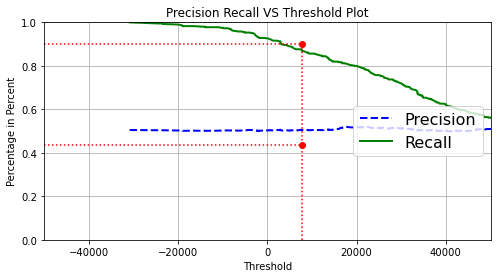

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold")        # Not shown
    plt.ylabel('Percentage in Percent')
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plt.title('Precision Recall VS Threshold Plot')
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.9], "r:")         # Not shown
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      # Not shown
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")# Not shown
plt.plot([7813], [0.9], "ro")                   # Not shown
plt.plot([7813], [0.4368], "ro")                # Not shown

plt.show()

## Precision and Recall Plot

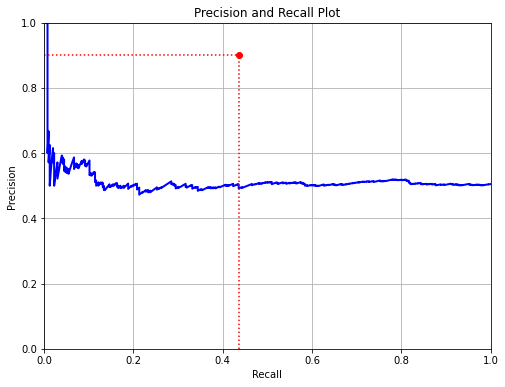

In [26]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

## ROC Curve

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

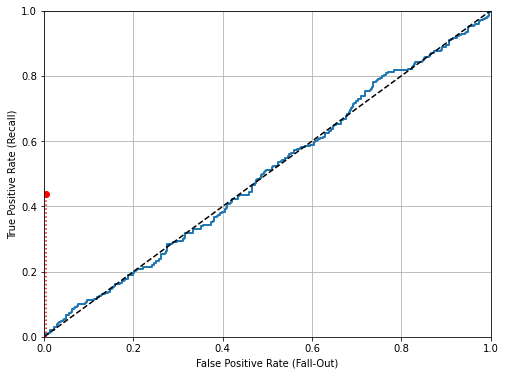

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [33]:
roc_auc_score(y_train, y_scores)

0.5006125612561256

# Notes
Kemungkinan penyebab akurasi, recall, presisi, dan F-1 score rendah, antara lain:
- Jumlah dataset kurang, sekarang menggunakan 1000 cases
- Jumlah fitur yang kurang (recall naik, setelah fitur date dan time di encoder label)
- Proporsi kelas pada train dan test tidak sama (Bukan penyebab, sudah dicek)
- Hubungan antar fitur tidak kuat (bisa lihat heatmap correlation)
